<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<center><b><h1>Jeet_Bhalodi</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [7]:
data = pd.read_csv("googleplaystore.csv")

In [8]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
(data.isnull().sum()/len(data))*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [14]:
# For Checking Duplicates use duplicated()
data.duplicated().count()


10841

In [15]:
# Use drop_duplicates to Drop()
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().count()

10358

### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [19]:
# use Column.astype(str).str.replace
data['Installs']=data['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)

In [20]:
# use to_numeric to convert to int
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10358, dtype: object

In [21]:
data['Installs'] = pd.to_numeric(data['Installs'],errors='coerce')

In [22]:
data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10358, dtype: float64

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [36]:
# Same as Above
data['Price'] = data['Price'].astype(str).str.replace('$', '', regex=False)

In [38]:
data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10358, dtype: object

In [40]:
data['Price'] = pd.to_numeric(data['Price'],errors='coerce')

In [42]:
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10358, dtype: float64

**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [45]:
# Hint: Define a function clean_size(x).
# Hint: If 'M' in x: return float(x.replace('M', '')) * 1000000
# Hint: Handle the 'Varies with device' edge case carefully.

def clean_size(x):
    x = str(x)
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000
    elif 'k' in x:
        return float(x.replace('k', '')) * 1000
    elif 'Varies with device' in x:
        return np.nan
    else:
        try:
            return float(x)
        except:
            return np.nan

data['Size'] = data['Size'].apply(clean_size)
data['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10358, dtype: float64

### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

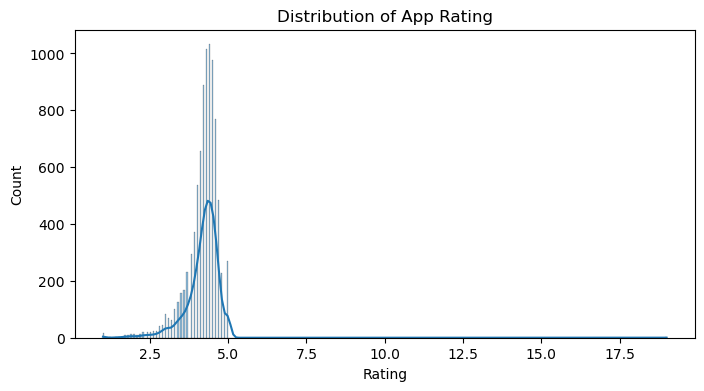

In [49]:
plt.figure(figsize=(8, 4))
sb.histplot(data['Rating'], kde=True)
plt.title('Distribution of App Rating')
plt.show()

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [51]:
data['Rating'] = data['Rating'].fillna(data.groupby('Category')['Rating'].transform('median'))
print(data['Rating'].isnull().sum())

0


**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [53]:
# dropna

In [54]:
data.dropna(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8821 non-null   object 
 1   Category        8821 non-null   object 
 2   Rating          8821 non-null   float64
 3   Reviews         8821 non-null   object 
 4   Size            8821 non-null   float64
 5   Installs        8821 non-null   float64
 6   Type            8821 non-null   object 
 7   Price           8821 non-null   float64
 8   Content Rating  8821 non-null   object 
 9   Genres          8821 non-null   object 
 10  Last Updated    8821 non-null   object 
 11  Current Ver     8821 non-null   object 
 12  Android Ver     8821 non-null   object 
dtypes: float64(4), object(9)
memory usage: 964.8+ KB
None


In [78]:
data.to_csv("Update_csv.csv")

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [61]:
# Hint: numeric_only Use CORR

corr_matrix = data[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].apply(pd.to_numeric, errors='coerce').corr()
corr_matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.074387,0.065161,0.048168,-0.019242
Reviews,0.074387,1.000000,0.237854,0.633603,-0.009701
Size,0.065161,0.237854,1.000000,0.168805,-0.023818
Installs,0.048168,0.633603,0.168805,1.000000,-0.010290
Price,-0.019242,-0.009701,-0.023818,-0.010290,1.000000


In [63]:
data.shape
print(data.corr(numeric_only=True))

            Rating      Size  Installs     Price
Rating    1.000000  0.065161  0.048168 -0.019242
Size      0.065161  1.000000  0.168805 -0.023818
Installs  0.048168  0.168805  1.000000 -0.010290
Price    -0.019242 -0.023818 -0.010290  1.000000


**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

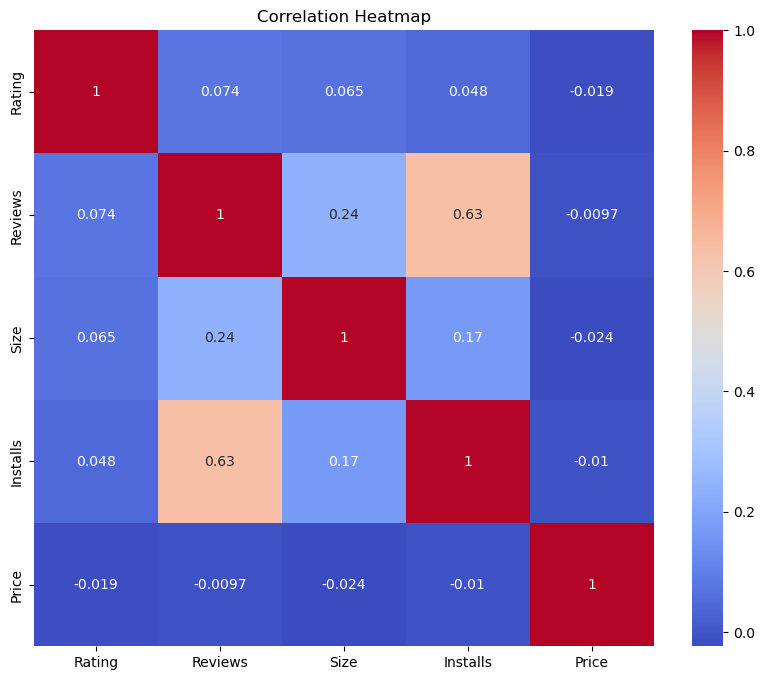

In [66]:
# Hint: sns.heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

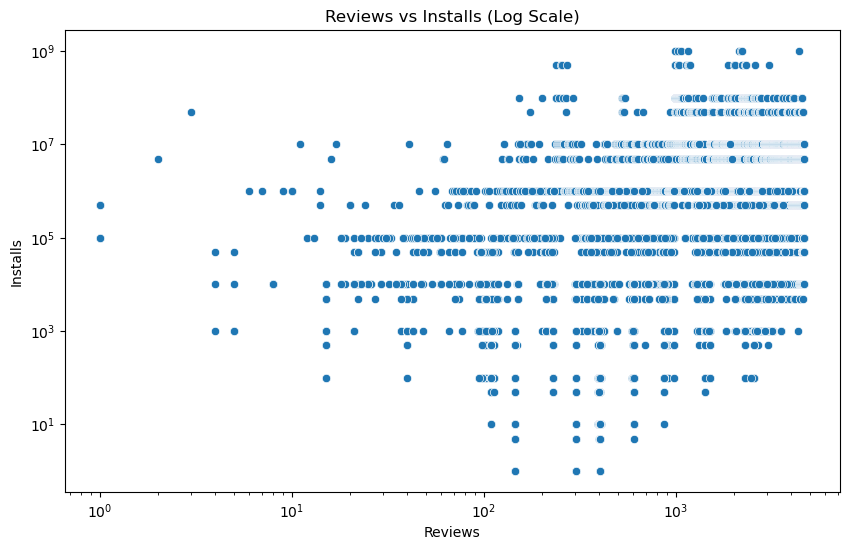

In [69]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Reviews', y='Installs', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews vs Installs (Log Scale)')
plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

Category
GAME                  2.680256e+10
FAMILY                6.697162e+09
TOOLS                 3.526595e+09
COMMUNICATION         3.336943e+09
NEWS_AND_MAGAZINES    3.215006e+09
PRODUCTIVITY          2.711313e+09
PHOTOGRAPHY           2.390898e+09
SHOPPING              1.312749e+09
SPORTS                1.062449e+09
PERSONALIZATION       9.971688e+08
Name: Installs, dtype: float64


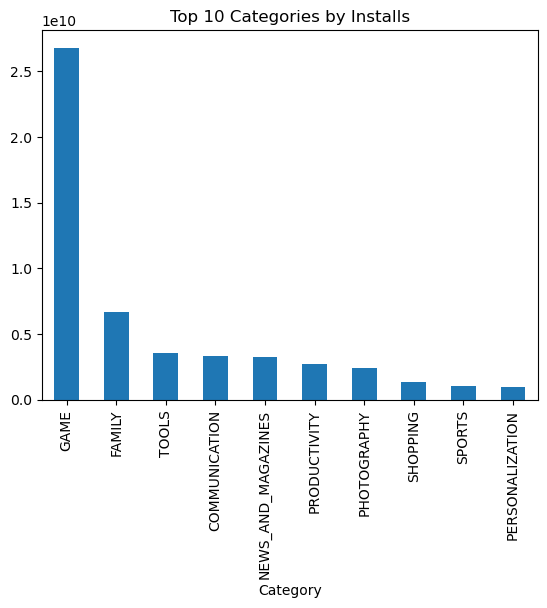

In [71]:
top_cats = data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(top_cats)
top_cats.plot(kind='bar')
plt.title('Top 10 Categories by Installs')
plt.show()

### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


numerical_features = ['Reviews', 'Size', 'Installs', 'Price']
categorical_features = ['Category', 'Content Rating']

In [226]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Reviews'], inplace=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [228]:
preprocessor

ColumnTransformer(transformers=[('numerical_features', StandardScaler(),
                                 ['Reviews', 'Size', 'Installs', 'Price']),
                                ('categorical_features',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Category', 'Content Rating'])])

# Without Pipline

In [222]:
from sklearn.preprocessing import StandardScaler

In [224]:
X = data[numerical_features + categorical_features]
preprocessor.fit(X)
# print("Pipeline fitted successfully.")

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Reviews', 'Size', 'Installs', 'Price']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Category', 'Content Rating'])])

--- Numeric Scaling Results ---
  Reviews  Reviews_Scaled
0     159       -0.146291
1     967       -0.145787
2   87510       -0.091790
3  215644       -0.011842
4     967       -0.145787


,Cat_1.9,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,Cat_COMMUNICATION,Cat_DATING,Cat_EDUCATION,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# With Pipline(Optional part)

In [31]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


